# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build machine learning model capable of predicting whether or not someone has heart disease bast on their medical attributes.
 We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

# problem defination 
Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# Heart Disease Data Dictionary

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn;

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done


In [2]:
!conda install --yes --prefix {sys.prefix} xgboost;

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done


In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#model from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

#model Evaluation 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
df=pd.read_csv("heart-disease.csv")

In [5]:
df.shape

(303, 14)

# Data Exploration (exploratory data analysis or EDA)

In [6]:
df.head().style.background_gradient(cmap='Pastel1').set_properties(**{'font-family': 'Bodoni'})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

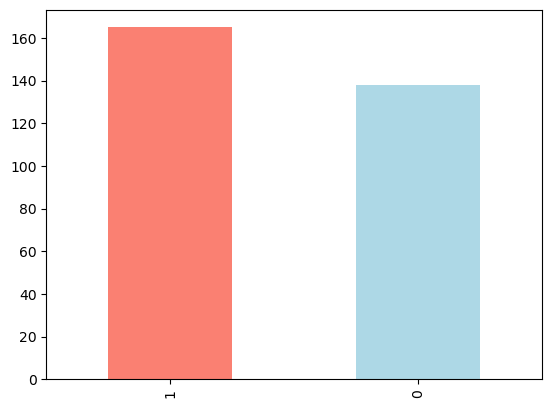

In [10]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


# Heart Disease Frequency according to Sex

In [15]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

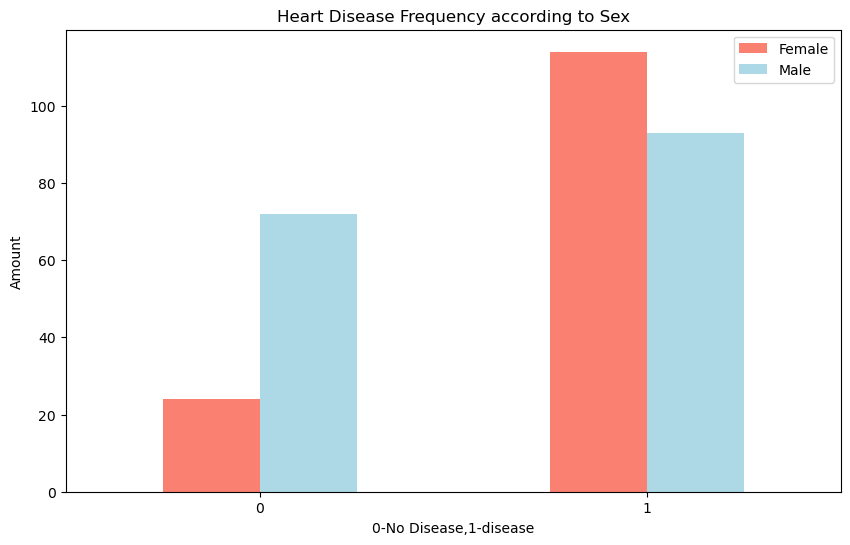

In [16]:
pd.crosstab(df.sex,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart Disease Frequency according to Sex")
plt.xlabel('0-No Disease,1-disease')
plt.ylabel('Amount')
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [17]:
df.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0


# Age vs. Max Heart Rate for Heart Disease



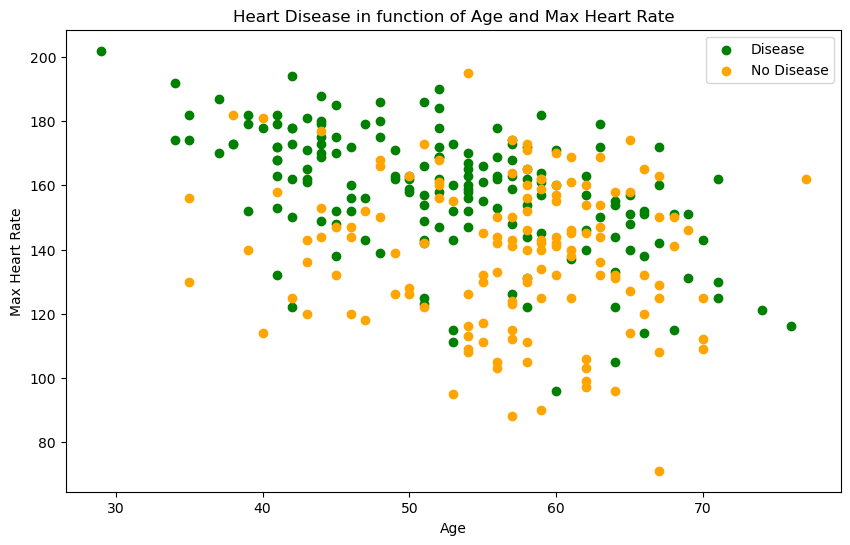

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color='green')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='orange')
plt.title( "Heart Disease in function of Age and Max Heart Rate")
plt.xlabel ("Age" )
plt.ylabel ("Max Heart Rate" )
plt.legend (["Disease","No Disease" ]);

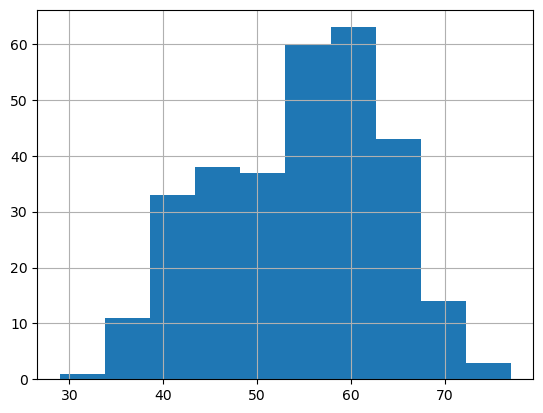

In [19]:
df.age.hist();

# Heart Disease Frequency per Chest Pain Type

In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


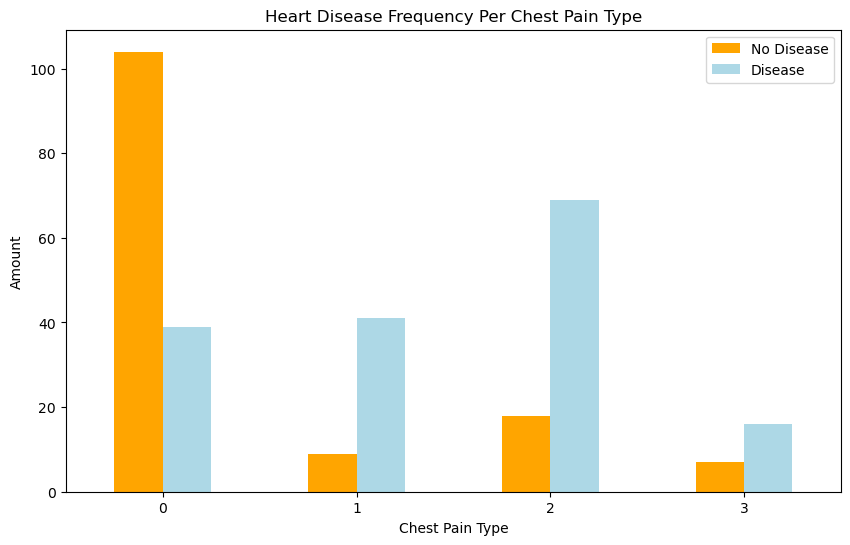

In [21]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['orange','lightblue'])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel ("Chest Pain Type")
plt.ylabel ( "Amount")
plt.legend([ "No Disease", "Disease" ])
plt.xticks (rotation=0);

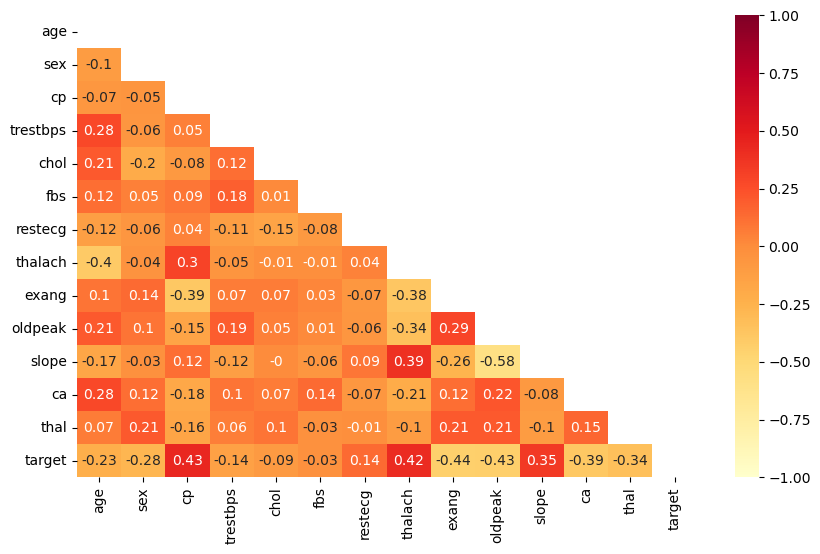

In [22]:
plt.figure(figsize=(10,6))
matrix=df.corr().round(2)
mask=np.triu(np.ones_like(matrix,dtype=bool))
sns.heatmap(matrix,annot=True,vmin=-1,
    vmax=1,
    cmap="YlOrRd",
    center=0,mask=mask);

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df.shape

(303, 14)

In [25]:
x=df.drop("target",axis=1)
y=df.target

In [26]:
x.shape

(303, 13)

In [27]:
y.shape

(303,)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train.shape

(242, 13)

In [30]:
models={"LR":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "SVC": SVC(),
       "DTC":DecisionTreeClassifier(),
        "RFC":RandomForestClassifier(),
        "GBC":GradientBoostingClassifier(),
        "ABC":AdaBoostClassifier(), 
        "ETC":ExtraTreesClassifier(),
        "XGB":XGBClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    return model_score

In [31]:
model_scores = fit_and_score (models=models,
                              x_train=x_train,
                              x_test=x_test, 
                              y_train=y_train,
                              y_test=y_test)
model_scores

{'LR': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'SVC': 0.7049180327868853,
 'DTC': 0.8360655737704918,
 'RFC': 0.8360655737704918,
 'GBC': 0.7704918032786885,
 'ABC': 0.8032786885245902,
 'ETC': 0.8688524590163934,
 'XGB': 0.819672131147541}

<Figure size 1500x1000 with 0 Axes>

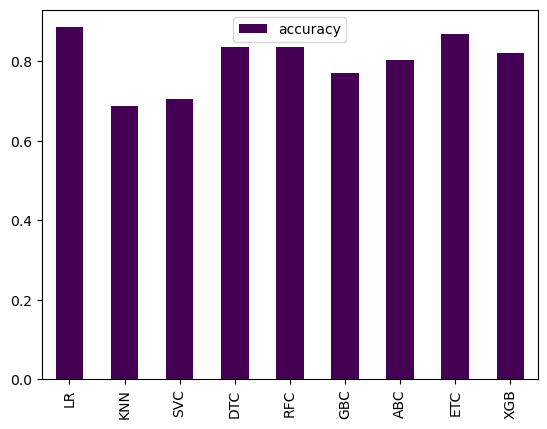

In [32]:
comape_model=pd.DataFrame(model_scores,index=["accuracy"])
plt.figure(figsize=(15,10))
comape_model.T.plot.bar(cmap='viridis')
plt.show();

# Hypertuning knn model 

In [33]:
train_score=[]
test_score=[]
knn=KNeighborsClassifier()
neighbors=range(1,21)
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    knn.score(x_test,y_test)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))


In [34]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

The Maximmum KNN score is :75.41%


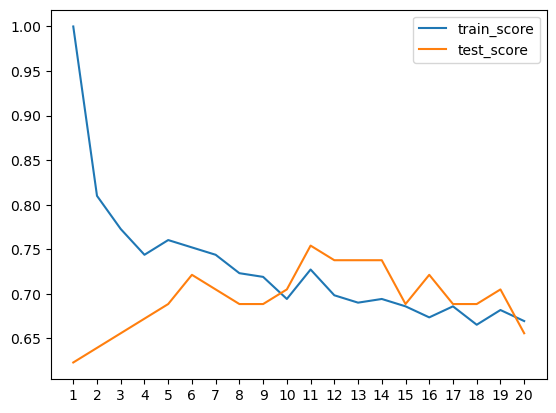

In [36]:
plt.plot(neighbors,train_score,label="train_score")
plt.plot(neighbors,test_score,label="test_score")
plt.xticks(np.arange(1,21,1))
plt.legend()
print(f"The Maximmum KNN score is :{max(test_score)*100:.2f}%")

# Hypertuning by RandomizedSearchcv

In [37]:
LR_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }]
SVC_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

DTC_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

RFC_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]}

GBC_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100]}


ABC_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}



# Logistic Regression

In [38]:
np.random.seed(42)
LR_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=LR_grid,
                             n_iter=20,
                             cv=5,
                             verbose=True)
LR_log_reg.fit(x_train,y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [39]:
LR_log_reg.best_params_

{'solver': 'sag', 'penalty': 'l2', 'max_iter': 5000, 'C': 0.615848211066026}

In [40]:
LR_log_reg.score(x_test,y_test)

0.8852459016393442

# SVC Claassifier

In [41]:
np.random.seed(42)
SVC_log_reg=RandomizedSearchCV(SVC(),
                             param_distributions=SVC_grid,
                             n_iter=20,
                             cv=5,
                             verbose=True)
SVC_log_reg.fit(x_train,y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [42]:
SVC_log_reg.best_params_

{'kernel': 'linear', 'gamma': 0.0001, 'C': 100}

In [43]:
SVC_log_reg.score(x_test,y_test)

0.8688524590163934

# DecisionTreeClassifier

In [44]:
np.random.seed(42)
DTC_log_reg=RandomizedSearchCV(DecisionTreeClassifier(),
                             param_distributions=DTC_grid,
                             n_iter=20,
                             cv=5,
                             verbose=True)
DTC_log_reg.fit(x_train,y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [45]:
DTC_log_reg.best_params_

{'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'entropy'}

In [46]:
DTC_log_reg.score(x_test,y_test)

0.7540983606557377

# RandomForestClassifier

In [47]:
np.random.seed(42)
RFC_log_reg=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=RFC_grid,
                             n_iter=20,
                             cv=5,
                             verbose=True)
RFC_log_reg.fit(x_train,y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [48]:
RFC_log_reg.best_params_

{'n_estimators': 1250,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 2,
 'max_depth': 15,
 'bootstrap': True}

In [49]:
RFC_log_reg.score(x_test,y_test)

0.8688524590163934

# GradientBoostingClassifier

In [50]:
np.random.seed(42)
GBC_log_reg=RandomizedSearchCV(GradientBoostingClassifier(),
                             param_distributions=GBC_distributions,
                             n_iter=20,
                             cv=5,
                             verbose=True)
GBC_log_reg.fit(x_train,y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [51]:
GBC_log_reg.best_params_

{'n_estimators': 50, 'max_leaf_nodes': 2}

In [52]:
GBC_log_reg.score(x_test,y_test)

0.8688524590163934

# AdaBoostClassifier

In [53]:
np.random.seed(42)
ABC_log_reg=RandomizedSearchCV(AdaBoostClassifier(),
                             param_distributions=ABC_grid,
                             n_iter=20,
                             cv=5,
                             verbose=True)
ABC_log_reg.fit(x_train,y_train);


Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [54]:
ABC_log_reg.best_params_

{'n_estimators': 500, 'learning_rate': 0.1}

In [55]:
ABC_log_reg.score(x_test,y_test)

0.7868852459016393

## As our model gives best result with Logisttic Regression we try to again tune with Grid Search CV

In [56]:
np.random.seed(42)
LR_log_reg1=GridSearchCV(LogisticRegression(),
                             param_grid=LR_grid,
                             cv=5,
                             verbose=True)
LR_log_reg1.fit(x_train,y_train);


Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


In [57]:
LR_log_reg1.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [58]:
LR_log_reg1.score(x_test,y_test)

0.8852459016393442

# roc_auc_score, roc_curve

In [59]:
y_pred=LR_log_reg1.predict(x_test)

In [60]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [61]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [81]:
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


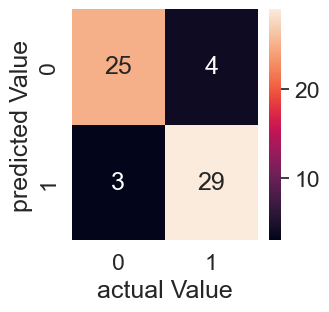

In [89]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    plt.xlabel('actual Value')
    plt.ylabel('predicted Value')
plot_conf_matrix(y_test,y_pred)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# cross validation 

In [95]:
LR_log_reg1.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [106]:
LR=LogisticRegression(C= 0.23357214690901212,
                        max_iter= 100,
                        penalty= "l2",
                        solver= 'liblinear')

In [109]:
cv_acc=cross_val_score(LR,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [111]:
cv_precision=cross_val_score(LR,
                      x,
                      y,
                      cv=5,
                      scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [112]:
cv_recall=cross_val_score(LR,
                      x,
                      y,
                      cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [113]:
cv_f1=cross_val_score(LR,
                      x,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

In [120]:
val_matrix=pd.DataFrame({"Accuracy":cv_acc,
                         "precision":cv_precision,
                         "recall":cv_recall,
                         "f1":cv_f1},index=[1])

<Axes: >

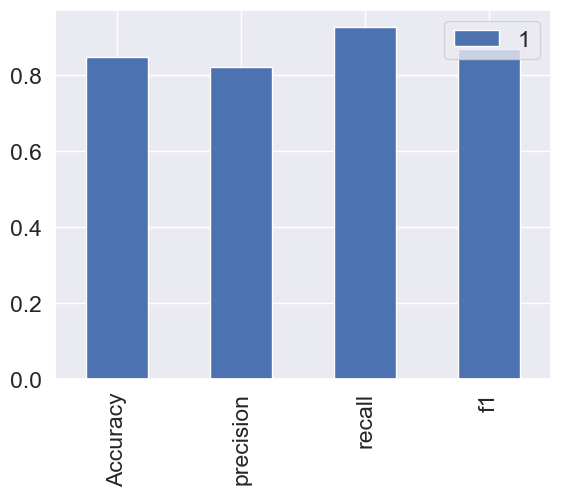

In [122]:
val_matrix.T.plot(kind='bar')

In [123]:
 LR=LogisticRegression(C= 0.23357214690901212,
                        max_iter= 100,
                        penalty= "l2",
                        solver= 'liblinear')

In [125]:
LR.fit(x_train,y_train);

In [126]:
LR.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [128]:
feature_dict=dict(zip(df.columns,list(LR.coef_[0])))

In [129]:
feature_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

<Axes: title={'center': 'Feature Importance'}>

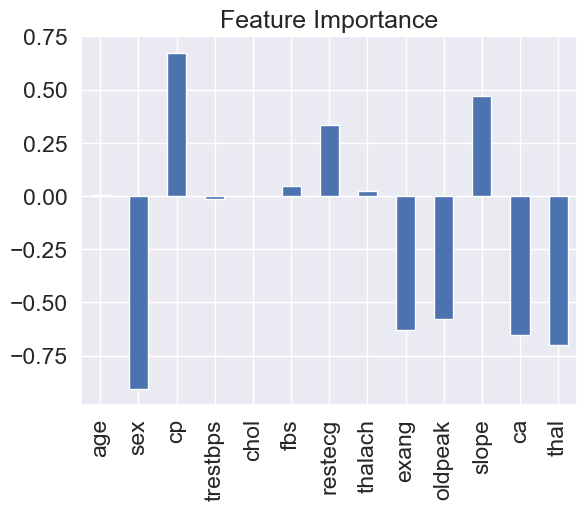

In [145]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df
feature_df.T.plot.bar(title="Feature Importance",legend=False)